In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from astropy.table import Table
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../train_data/TrainingOriginal.csv')
len(data)

2428

In [3]:
data.head()

,Unnamed: 0,Unnamed: 0.1,APOGEE_ID_1,source_id,LOGG,TEFF,ALPHA_M,M_H,C_FE,N_FE,...,age_68L,ageErr,logAge,logAgeErr,distKpc,distKpc_68u,distKpc_68l,distErrKpc,logDistKpc,logDistKpcErr
0,227,302,2M19412154+3843123,2076159569965114624,2.878855,4841.8115,0.064926,-0.287753,-0.039784,0.176630,...,5.8939,1.66460,0.864772,0.097237,0.605286,0.614044,0.596348,0.008848,-0.218039,0.006350
1,365,464,2M19282346+3924283,2053168816185494144,2.579402,4972.5083,0.000967,0.005454,-0.226555,0.421955,...,1.3044,0.02985,0.126975,0.009718,1.268108,1.277879,1.258346,0.009767,0.103156,0.003345
2,2924,3184,2M19045044+5011175,2133605238575768064,3.056308,4862.7140,0.206148,-0.375060,0.008855,0.084089,...,7.3282,2.15440,0.962199,0.100422,1.229389,1.248775,1.211658,0.018559,0.089689,0.006552
3,2501,2743,2M19425864+4750350,2080649799347029632,3.052974,4686.2637,0.080371,0.212970,0.014722,0.285538,...,7.4989,2.10950,0.975363,0.096926,0.650986,0.661429,0.641564,0.009933,-0.186429,0.006622
4,2001,2211,2M19430881+4544039,2080005141938797440,2.613571,4663.5977,-0.004673,0.181860,-0.151104,0.331916,...,3.3497,0.47415,0.567356,0.054130,1.243429,1.263283,1.225462,0.018910,0.094621,0.006600


In [3]:
feats = ['LOGG', 'TEFF', 'ALPHA_M', 'M_H', 'C_FE', 'N_FE', \
           'G', 'BP', 'RP', 'J', 'H', 'K']

featsErr = ['LOGG_ERR', 'TEFF_ERR', 'ALPHA_M_ERR', 'M_H_ERR', 'C_FE_ERR', 'N_FE_ERR', \
           'G_ERR', 'BP_ERR', 'RP_ERR', 'J_ERR', 'H_ERR', 'K_ERR']

def norm(feat, eFeat):
    
    mu  = np.mean(feat)
    std = np.std(feat)
    
    scaledFeat  = (feat-mu)/std
    scaledEFeat = eFeat/std

    return(scaledFeat,scaledEFeat)

In [4]:
for i in range(len(feats)):
    scaledFeat, scaledEFeat = norm(data[feats[i]], data[featsErr[i]])
    data[feats[i]+'_NORM'] = scaledFeat
    data[featsErr[i]+'_NORM'] = scaledEFeat

In [5]:
data.head()

,Unnamed: 0,Unnamed: 0.1,APOGEE_ID_1,source_id,LOGG,TEFF,ALPHA_M,M_H,C_FE,N_FE,...,BP_NORM,BP_ERR_NORM,RP_NORM,RP_ERR_NORM,J_NORM,J_ERR_NORM,H_NORM,H_ERR_NORM,K_NORM,K_ERR_NORM
0,227,302,2M19412154+3843123,2076159569965114624,2.878855,4841.8115,0.064926,-0.287753,-0.039784,0.176630,...,-1.531143,0.001007,-1.487326,0.000698,-1.453456,0.024115,-1.474416,0.019799,-1.428394,0.020973
1,365,464,2M19282346+3924283,2053168816185494144,2.579402,4972.5083,0.000967,0.005454,-0.226555,0.421955,...,-0.807380,0.001729,-0.779845,0.001083,-0.735733,0.024115,-0.667334,0.025622,-0.712987,0.020973
2,2924,3184,2M19045044+5011175,2133605238575768064,3.056308,4862.7140,0.206148,-0.375060,0.008855,0.084089,...,0.869795,0.001568,1.079026,0.000932,1.247476,0.031006,1.277581,0.034939,1.330697,0.024468
3,2501,2743,2M19425864+4750350,2080649799347029632,3.052974,4686.2637,0.080371,0.212970,0.014722,0.285538,...,-0.552588,0.001713,-0.569013,0.000947,-0.546255,0.024115,-0.562519,0.020963,-0.559187,0.018643
4,2001,2211,2M19430881+4544039,2080005141938797440,2.613571,4663.5977,-0.004673,0.181860,-0.151104,0.331916,...,-0.505505,0.001971,-0.587755,0.000949,-0.628936,0.024115,-0.688297,0.019799,-0.715318,0.013982


In [6]:
N = len(feats)
mu_feats = np.ones(N)
std_feats = np.ones(N)

for i in range(len(feats)):
    mu_feats[i] = np.mean(data[feats[i]])
    std_feats[i] = np.std(data[feats[i]])

In [7]:
np.save('../train_data/AllGlobal_Mu_Final.npy', mu_feats)
np.save('../train_data/AllGlobal_Std_Final.npy', std_feats)

In [9]:
mu_feats[0]

2.7069915404448106

In [10]:
np.mean(data['LOGG'])

2.7069915404448106

In [8]:
data.to_csv('../train_data/AllTrainedNorm.csv')

In [12]:
data.head()

,Unnamed: 0,Unnamed: 0.1,APOGEE_ID_1,source_id,LOGG,TEFF,ALPHA_M,M_H,C_FE,N_FE,...,BP_NORM,BP_ERR_NORM,RP_NORM,RP_ERR_NORM,J_NORM,J_ERR_NORM,H_NORM,H_ERR_NORM,K_NORM,K_ERR_NORM
0,227,302,2M19412154+3843123,2076159569965114624,2.878855,4841.8115,0.064926,-0.287753,-0.039784,0.176630,...,-1.531143,0.001007,-1.487326,0.000698,-1.453456,0.024115,-1.474416,0.019799,-1.428394,0.020973
1,365,464,2M19282346+3924283,2053168816185494144,2.579402,4972.5083,0.000967,0.005454,-0.226555,0.421955,...,-0.807380,0.001729,-0.779845,0.001083,-0.735733,0.024115,-0.667334,0.025622,-0.712987,0.020973
2,2924,3184,2M19045044+5011175,2133605238575768064,3.056308,4862.7140,0.206148,-0.375060,0.008855,0.084089,...,0.869795,0.001568,1.079026,0.000932,1.247476,0.031006,1.277581,0.034939,1.330697,0.024468
3,2501,2743,2M19425864+4750350,2080649799347029632,3.052974,4686.2637,0.080371,0.212970,0.014722,0.285538,...,-0.552588,0.001713,-0.569013,0.000947,-0.546255,0.024115,-0.562519,0.020963,-0.559187,0.018643
4,2001,2211,2M19430881+4544039,2080005141938797440,2.613571,4663.5977,-0.004673,0.181860,-0.151104,0.331916,...,-0.505505,0.001971,-0.587755,0.000949,-0.628936,0.024115,-0.688297,0.019799,-0.715318,0.013982


(array([ 16.,  58.,  93., 184., 294., 419., 470., 566., 318.,  10.]),
 array([ 8.896568 ,  9.3999375,  9.903307 , 10.4066765, 10.910046 ,
        11.4134155, 11.916785 , 12.4201545, 12.923524 , 13.4268935,
        13.930263 ]),
 <a list of 10 Patch objects>)

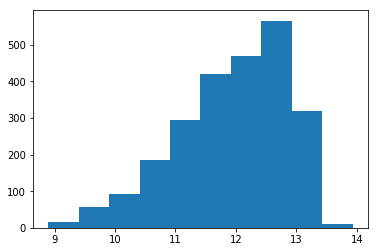

In [13]:
plt.hist(data['G'])

(array([ 16.,  58.,  93., 184., 294., 419., 470., 566., 318.,  10.]),
 array([-3.33256335, -2.78244442, -2.23232548, -1.68220655, -1.13208762,
        -0.58196868, -0.03184975,  0.51826918,  1.06838812,  1.61850705,
         2.16862598]),
 <a list of 10 Patch objects>)

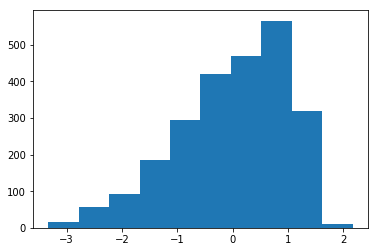

In [14]:
plt.hist((data['G']-np.mean(data['G']))/np.std(data['G']))

(array([ 16.,  58.,  93., 184., 294., 419., 470., 566., 318.,  10.]),
 array([-3.33256335, -2.78244442, -2.23232548, -1.68220655, -1.13208762,
        -0.58196868, -0.03184975,  0.51826918,  1.06838812,  1.61850705,
         2.16862598]),
 <a list of 10 Patch objects>)

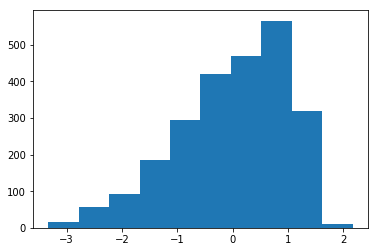

In [15]:
plt.hist(data['G_NORM'])

In [16]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'APOGEE_ID_1', 'source_id', 'LOGG',
       'TEFF', 'ALPHA_M', 'M_H', 'C_FE', 'N_FE', 'G', 'BP', 'RP', 'J', 'H',
       'K', 'LOGG_ERR', 'TEFF_ERR', 'ALPHA_M_ERR', 'M_H_ERR', 'C_FE_ERR',
       'N_FE_ERR', 'G_ERR', 'BP_ERR', 'RP_ERR', 'J_ERR', 'H_ERR', 'K_ERR',
       'age', 'age_68U', 'age_68L', 'ageErr', 'logAge', 'logAgeErr', 'distKpc',
       'distKpc_68u', 'distKpc_68l', 'distErrKpc', 'logDistKpc',
       'logDistKpcErr', 'LOGG_NORM', 'LOGG_ERR_NORM', 'TEFF_NORM',
       'TEFF_ERR_NORM', 'ALPHA_M_NORM', 'ALPHA_M_ERR_NORM', 'M_H_NORM',
       'M_H_ERR_NORM', 'C_FE_NORM', 'C_FE_ERR_NORM', 'N_FE_NORM',
       'N_FE_ERR_NORM', 'G_NORM', 'G_ERR_NORM', 'BP_NORM', 'BP_ERR_NORM',
       'RP_NORM', 'RP_ERR_NORM', 'J_NORM', 'J_ERR_NORM', 'H_NORM',
       'H_ERR_NORM', 'K_NORM', 'K_ERR_NORM'],
      dtype='object')

In [17]:
len(data)

2428